# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 9, 2022-06-12<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Portafolios de Inversión</font>

## <font color='#2B17B0'>Portafolios con Simulación Montecarlo</font>

Para el desarrollo del primer portafolio de inversión, vamos a seguir los siguiente pasos:

1. Importar librerías
1. Importar precios de cierre
1. Calcular retornos diarios y anuales
1. Calcular $\sigma$ diaria y anual
1. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual
1. Seleccionar de manera cuantitativa las acciones que formaran el portafolio (Sharp Ratio)
1. Calcular matriz de covarianza  de las acciones seleccionadas
1. Crear array NumPy para guardar los resultados de las simulaciones.
1. Realizar simulación Monte Carlo
1. Visualizar portafolio
1. Visualizar resultados óptimos

### <font color='royalblue'>1. Importar librerías</font>

In [2]:
from herramientas import herramientas_financieras as hf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import seaborn as sns
sns.set_style('darkgrid')

### <font color='royalblue'>2. Importar precios de cierre</font>

In [3]:
precios = hf.precios(hf.ipc(), '2021-01-01')
precios

,^mxx,ac,alfaa,alsea,asurb,bbajioo,bimboa,bolsaa,cemexcpo,cuervo,...,omab,orbia,pe&oles,pinfra,q,ra,tlevisacpo,vesta,volara,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-04,44703.000000,84.029762,14.305843,26.330000,302.124908,19.714550,40.686031,41.027256,10.39,49.095123,...,106.162445,44.398949,382.071594,159.268982,94.073730,76.588600,32.061192,39.516880,23.889999,55.524395
2021-01-05,44908.121094,85.873032,14.216370,26.200001,304.243591,19.699587,40.875927,41.069893,10.66,49.114773,...,106.831009,44.266129,381.321960,155.392868,93.545380,76.236435,33.092628,38.762287,23.510000,56.242466
2021-01-06,45587.160156,86.579926,14.246194,26.559999,322.459137,19.811815,40.752495,41.436588,11.55,49.065655,...,111.436722,44.655098,380.522339,152.249100,93.675301,76.219666,33.671001,39.437450,24.190001,58.037647
2021-01-07,46188.660156,89.792221,14.276018,26.730000,317.194427,19.894114,41.322193,41.854450,11.65,49.596100,...,112.501495,45.508923,389.927917,158.250839,94.255630,77.829582,35.222969,39.775032,23.900000,56.970242
2021-01-08,46729.300781,89.335876,14.116954,26.860001,319.120544,20.028788,41.170273,42.468452,11.57,49.605919,...,111.420219,49.635750,368.108124,155.750107,98.941566,78.408150,35.897739,41.572155,23.879999,58.949787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,54432.191406,179.110001,11.220000,51.119999,499.359985,54.990002,92.269997,37.919998,11.64,40.810001,...,189.100006,39.020000,277.970001,176.160004,118.550003,137.740005,18.070000,57.580002,25.129999,69.510002
2023-06-07,54291.441406,181.089996,11.330000,51.110001,497.799988,54.900002,91.739998,37.849998,11.93,41.259998,...,187.610001,37.700001,274.609985,179.600006,117.879997,138.000000,17.930000,58.020000,25.160000,69.519997
2023-06-08,54338.179688,179.899994,11.350000,52.880001,494.190002,54.480000,93.220001,37.700001,11.99,40.820000,...,184.740005,38.150002,288.970001,181.320007,117.980003,136.919998,17.809999,57.810001,25.340000,68.220001


### <font color='royalblue'>3. Calcular retornos diarios y anuales</font>

#### Retornos diarios

In [6]:
retornos = np.log(precios/precios.shift(1))
retornos.dropna(inplace=True)
retornos

,^mxx,ac,alfaa,alsea,asurb,bbajioo,bimboa,bolsaa,cemexcpo,cuervo,...,omab,orbia,pe&oles,pinfra,q,ra,tlevisacpo,vesta,volara,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.004578,0.021699,-0.006274,-0.004950,0.006988,-0.000759,0.004656,0.001039,0.025655,0.000400,...,0.006278,-0.002996,-0.001964,-0.024638,-0.005632,-0.004609,0.031664,-0.019280,-0.016034,0.012850
2021-01-06,0.015007,0.008198,0.002096,0.013647,0.058148,0.005681,-0.003024,0.008889,0.080187,-0.001001,...,0.042209,0.008749,-0.002099,-0.020439,0.001388,-0.000220,0.017326,0.017268,0.028514,0.031420
2021-01-07,0.013108,0.036430,0.002091,0.006380,-0.016462,0.004145,0.013883,0.010034,0.008621,0.010753,...,0.009510,0.018940,0.024417,0.038663,0.006176,0.020902,0.045061,0.008524,-0.012061,-0.018563
2021-01-08,0.011637,-0.005095,-0.011205,0.004852,0.006054,0.006747,-0.003683,0.014563,-0.006891,0.000198,...,-0.009658,0.086803,-0.057585,-0.015929,0.048519,0.007406,0.018976,0.044191,-0.000837,0.034157
2021-01-11,-0.007173,0.011948,-0.023514,-0.026789,-0.006777,-0.008252,0.007124,-0.025421,-0.018317,-0.002379,...,-0.027183,-0.032045,-0.008563,-0.005174,-0.029224,-0.019219,-0.012157,-0.023929,-0.023730,0.002794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.016600,0.010495,0.031691,0.000783,0.026131,-0.001998,-0.003678,0.018364,0.041216,0.012824,...,0.038929,0.037336,0.023330,0.006664,0.008897,0.013449,0.041814,0.001390,0.003987,0.004181
2023-06-07,-0.002589,0.010994,0.009756,-0.000196,-0.003129,-0.001638,-0.005761,-0.001848,0.024609,0.010966,...,-0.007911,-0.034414,-0.012161,0.019339,-0.005668,0.001886,-0.007778,0.007612,0.001193,0.000144
2023-06-08,0.000861,-0.006593,0.001764,0.034045,-0.007278,-0.007680,0.016004,-0.003971,0.005017,-0.010721,...,-0.015416,0.011866,0.050971,0.009531,0.000848,-0.007857,-0.006715,-0.003626,0.007129,-0.018877


In [7]:
retornos_promedios = retornos.mean()
retornos_promedios

^mxx          0.000316
ac            0.001221
alfaa        -0.000402
alsea         0.001263
asurb         0.000822
bbajioo       0.001691
bimboa        0.001342
bolsaa       -0.000156
cemexcpo      0.000233
cuervo       -0.000283
elektra      -0.000211
femsaubd      0.000436
gapb          0.000872
gcarsoa1      0.000988
gcc           0.000408
gentera       0.001328
gfinburo      0.001199
gfnorteo      0.000701
gmexicob      0.000120
grumab        0.000304
kimbera       0.000466
kofubl        0.001175
labb         -0.000201
livepolc-1    0.000869
megacpo      -0.000707
omab          0.000933
orbia        -0.000274
pe&oles      -0.000514
pinfra        0.000253
q             0.000368
ra            0.000941
tlevisacpo   -0.000985
vesta         0.000631
volara        0.000076
walmex        0.000305
dtype: float64

#### Retornos anualizados

In [8]:
retornos_anuales = retornos_promedios * 252
retornos_anuales

^mxx          0.079526
ac            0.307614
alfaa        -0.101389
alsea         0.318265
asurb         0.207216
bbajioo       0.426023
bimboa        0.338222
bolsaa       -0.039356
cemexcpo      0.058689
cuervo       -0.071243
elektra      -0.053197
femsaubd      0.109753
gapb          0.219808
gcarsoa1      0.249099
gcc           0.102726
gentera       0.334576
gfinburo      0.302210
gfnorteo      0.176539
gmexicob      0.030145
grumab        0.076500
kimbera       0.117449
kofubl        0.296223
labb         -0.050732
livepolc-1    0.218948
megacpo      -0.178166
omab          0.235187
orbia        -0.068979
pe&oles      -0.129575
pinfra        0.063707
q             0.092645
ra            0.237208
tlevisacpo   -0.248319
vesta         0.158992
volara        0.019265
walmex        0.076981
dtype: float64

### <font color='royalblue'>4. Calcular $\sigma$ diaria y anual</font>

In [9]:
sigma = retornos.std()
sigma

^mxx          0.009520
ac            0.013524
alfaa         0.018510
alsea         0.019633
asurb         0.016699
bbajioo       0.019230
bimboa        0.019981
bolsaa        0.015451
cemexcpo      0.024833
cuervo        0.016452
elektra       0.012701
femsaubd      0.014132
gapb          0.019176
gcarsoa1      0.021859
gcc           0.016761
gentera       0.022508
gfinburo      0.019694
gfnorteo      0.021889
gmexicob      0.025854
grumab        0.016073
kimbera       0.016626
kofubl        0.013708
labb          0.020117
livepolc-1    0.015843
megacpo       0.017366
omab          0.017799
orbia         0.018706
pe&oles       0.028307
pinfra        0.014771
q             0.015223
ra            0.019865
tlevisacpo    0.024948
vesta         0.015067
volara        0.030443
walmex        0.016356
dtype: float64

#### Sigma anual

In [10]:
sigma_anual = sigma * np.sqrt(252)
#sigma_anual = sigma * (252)**.5
sigma_anual

^mxx          0.151132
ac            0.214691
alfaa         0.293841
alsea         0.311658
asurb         0.265083
bbajioo       0.305265
bimboa        0.317192
bolsaa        0.245278
cemexcpo      0.394218
cuervo        0.261175
elektra       0.201616
femsaubd      0.224344
gapb          0.304410
gcarsoa1      0.346999
gcc           0.266076
gentera       0.357300
gfinburo      0.312632
gfnorteo      0.347481
gmexicob      0.410422
grumab        0.255151
kimbera       0.263937
kofubl        0.217602
labb          0.319345
livepolc-1    0.251504
megacpo       0.275682
omab          0.282552
orbia         0.296943
pe&oles       0.449360
pinfra        0.234479
q             0.241657
ra            0.315350
tlevisacpo    0.396031
vesta         0.239187
volara        0.483273
walmex        0.259639
dtype: float64

### <font color='royalblue'>5. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual</font>

### <font color='royalblue'>6. Seleccionar de manera cuantitativa las acciones que formaran el portafolio</font>

#### Sharpe Ratio
El Sharp Ratio, mide el rendimiento adicional que genera un activo por encima de la tasa de retorno libre de riesgo, ajustado por su volatilidad.<br><br>
$$SharpRatio = \frac{r_x - r_f}{\sigma_x}$$<br>
Como tasa libre de riesgo utilizaremos CETES a 28 dias $\approx11\%$ anual.

In [11]:
rf = .11

sharp = ((retornos_anuales - rf) / sigma_anual).sort_values(ascending=False)
sharp

bbajioo       1.035242
ac            0.920458
kofubl        0.855796
bimboa        0.719508
alsea         0.668249
gentera       0.628535
gfinburo      0.614812
omab          0.443059
livepolc-1    0.433186
ra            0.403388
gcarsoa1      0.400863
asurb         0.366738
gapb          0.360723
vesta         0.204827
gfnorteo      0.191490
kimbera       0.028222
femsaubd     -0.001099
gcc          -0.027338
q            -0.071818
walmex       -0.127173
cemexcpo     -0.130159
grumab       -0.131293
volara       -0.187752
gmexicob     -0.194569
pinfra       -0.197431
^mxx         -0.201640
labb         -0.503318
pe&oles      -0.533148
orbia        -0.602739
bolsaa       -0.608926
cuervo       -0.693951
alfaa        -0.719397
elektra      -0.809446
tlevisacpo   -0.904777
megacpo      -1.045285
dtype: float64

In [61]:
sharp_corte = .6
acciones_portafolio = sharp[sharp > sharp_corte]

acciones_portafolio

bbajioo     1.035242
ac          0.920458
kofubl      0.855796
bimboa      0.719508
alsea       0.668249
gentera     0.628535
gfinburo    0.614812
dtype: float64

In [62]:
nombre_acciones = list(acciones_portafolio.index)
numero_acciones = len(acciones_portafolio)

In [63]:
nombre_acciones

['bbajioo', 'ac', 'kofubl', 'bimboa', 'alsea', 'gentera', 'gfinburo']

In [64]:
numero_acciones

7

In [65]:
retornos[nombre_acciones]

,bbajioo,ac,kofubl,bimboa,alsea,gentera,gfinburo
fecha,,,,,,,
2021-01-05,-0.000759,0.021699,0.009293,0.004656,-0.004950,-0.028049,-0.028747
2021-01-06,0.005681,0.008198,0.001740,-0.003024,0.013647,0.006543,-0.001979
2021-01-07,0.004145,0.036430,0.015523,0.013883,0.006380,0.049825,0.029765
2021-01-08,0.006747,-0.005095,0.002670,-0.003683,0.004852,-0.016684,-0.009176
2021-01-11,-0.008252,0.011948,-0.008033,0.007124,-0.026789,-0.007388,0.012536
...,...,...,...,...,...,...,...
2023-06-06,-0.001998,0.010495,-0.003516,-0.003678,0.000783,0.050293,0.032728
2023-06-07,-0.001638,0.010994,0.022970,-0.005761,-0.000196,-0.020734,0.002545
2023-06-08,-0.007680,-0.006593,0.013023,0.016004,0.034045,0.002552,0.005989


### <font color='royalblue'>7. Calcular matriz de covarianza  de las acciones seleccionadas</font>

In [66]:
matriz_cov = retornos[nombre_acciones].cov()
matriz_cov

,bbajioo,ac,kofubl,bimboa,alsea,gentera,gfinburo
bbajioo,0.000370,0.000028,0.000047,0.000040,0.000090,0.000069,0.000111
ac,0.000028,0.000183,0.000048,0.000069,0.000017,0.000023,0.000038
kofubl,0.000047,0.000048,0.000188,0.000031,0.000037,0.000010,0.000027
bimboa,0.000040,0.000069,0.000031,0.000399,0.000041,0.000027,0.000118
alsea,0.000090,0.000017,0.000037,0.000041,0.000385,0.000098,0.000085
gentera,0.000069,0.000023,0.000010,0.000027,0.000098,0.000507,0.000073
gfinburo,0.000111,0.000038,0.000027,0.000118,0.000085,0.000073,0.000388


### <font color='royalblue'>8. Crear array NumPy para guardar los resultados de las simulaciones</font>
Incluir las siguientes columnas:
1. \# de simulación
  1. Retorno generado
  1. $\sigma$ del portafolio
  1. Sharp Ratio del portafolio
  1. y el peso (w) de cada acción que forman el portafolio

In [67]:
numero_simulaciones = 80000

simulacion = np.zeros ((numero_simulaciones, 4 + numero_acciones))

In [68]:
simulacion

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
simulacion.shape

(80000, 11)

### <font color='royalblue'>9. Realizar simulación Monte Carlo</font>

### <font color='gray'>Cálculo $E(R_p)$, $\sigma^2$ de un portafolio</font>
Para calcular el retorno de un portafolio de *"n"* activos:<br>
$E(R_p) = \displaystyle\sum_{i=1}^{n}{w_iE(R_i)}\implies Rw$<br><br>
Para calcular la $\sigma^2$ de un portafolio de dos activos -Recordar que la nombre como fórmula teórica-:<br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$<br><br>
Recordememos que la fórmula de la correlación es:<br><br>
$\large\rho=\frac{Cov_{i,j}}{\sigma_i \sigma_j}$<br><br>
Podemos simplificar la fórmula de la varianza eliminando sustituyendo la fórmula de la $\rho$ y simplificándola a:<br><br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\frac{Cov_{1,2}}{\sigma_1 \sigma_2}\implies \sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{1,2}$<br><br>
Para calcular la $\sigma^2$ de un portafolio de *"n"* activos:<br>
$$
\begin{array}{rcl}
\sigma_p^2 & = & \displaystyle\sum_{i=1}^{n} {w_i^2\sigma_i^2} +  \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j\neq i}^{n}w_iw_j\sigma_i\sigma_j\rho_{ij}\\
& = & \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=i}^{n}w_iw_j\sigma_{i,j}\\
& = & w^T\sum w 
\end{array}
$$
Donde $\sum$ es la matriz de varianza - covarianza

In [70]:
w = np.random.random(numero_acciones)
w = w/w.sum()

In [71]:
w

array([0.01309345, 0.14052527, 0.0030865 , 0.31836226, 0.08548121,
       0.16582447, 0.27362683])

In [72]:
rf

0.11

In [73]:
matriz_cov

,bbajioo,ac,kofubl,bimboa,alsea,gentera,gfinburo
bbajioo,0.000370,0.000028,0.000047,0.000040,0.000090,0.000069,0.000111
ac,0.000028,0.000183,0.000048,0.000069,0.000017,0.000023,0.000038
kofubl,0.000047,0.000048,0.000188,0.000031,0.000037,0.000010,0.000027
bimboa,0.000040,0.000069,0.000031,0.000399,0.000041,0.000027,0.000118
alsea,0.000090,0.000017,0.000037,0.000041,0.000385,0.000098,0.000085
gentera,0.000069,0.000023,0.000010,0.000027,0.000098,0.000507,0.000073
gfinburo,0.000111,0.000038,0.000027,0.000118,0.000085,0.000073,0.000388


In [86]:
for i in range(numero_simulaciones):
    
    #Cálculo de los pesos en la simulacion "i"
    w = np.random.random(numero_acciones)
    w = w/w.sum()
    
    #Cálculo E(Rp) y varianza, sigma portafolio:
    retorno_portafolio = np.sum(retornos_anuales[nombre_acciones] * w)
    varianza_portafolio = np.dot(w.T,  np.dot(matriz_cov, w))
    sigma_portafolio = np.sqrt(varianza_portafolio) * np.sqrt(252)
    
    #Guardar resultados simulaión:
    simulacion[i, 0] = i + 1 #<---- Núm de simulación
    simulacion[i, 1] = retorno_portafolio
    simulacion[i, 2] = sigma_portafolio
    simulacion[i, 3] = (simulacion[i,1] - rf) / simulacion[i, 2] # <--- Sharp Ratio
    for j in range(len(w)):
        simulacion[i,j+4] = w[j]
        
    

In [87]:
w.sum()

1.0

In [88]:
resultados = pd.DataFrame(simulacion)
resultados

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.328744,0.172662,1.266893,0.102144,0.215916,0.003478,0.077796,0.139352,0.237974,0.223340
1,2.0,0.317153,0.145314,1.425553,0.047715,0.259601,0.271535,0.105927,0.045679,0.145529,0.124015
2,3.0,0.331487,0.150423,1.472423,0.196291,0.192533,0.249357,0.033981,0.083815,0.088255,0.155768
3,4.0,0.334124,0.149605,1.498108,0.195004,0.222624,0.226274,0.131382,0.014461,0.091392,0.118863
4,5.0,0.323751,0.158347,1.349895,0.119977,0.289347,0.140165,0.079790,0.013147,0.088910,0.268664
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996.0,0.321622,0.176948,1.195959,0.033534,0.105326,0.050558,0.153308,0.215169,0.185951,0.256154
79996,79997.0,0.325085,0.160686,1.338542,0.074410,0.017143,0.320278,0.191075,0.237868,0.147900,0.011327
79997,79998.0,0.325771,0.145464,1.483327,0.119251,0.225733,0.300857,0.145086,0.020636,0.118064,0.070373
79998,79999.0,0.334542,0.156901,1.431109,0.169383,0.182519,0.114607,0.079706,0.195652,0.155986,0.102147


### <font color='gray'>Renombrar columnas</font>

In [89]:
nombre_columnas = ['# simulacion', 'Ret', 'Sigma', 'Sharpe'] + nombre_acciones
nombre_columnas

['# simulacion',
 'Ret',
 'Sigma',
 'Sharpe',
 'bbajioo',
 'ac',
 'kofubl',
 'bimboa',
 'alsea',
 'gentera',
 'gfinburo']

In [90]:
resultados.columns = nombre_columnas

In [91]:
resultados

,# simulacion,Ret,Sigma,Sharpe,bbajioo,ac,kofubl,bimboa,alsea,gentera,gfinburo
0,1.0,0.328744,0.172662,1.266893,0.102144,0.215916,0.003478,0.077796,0.139352,0.237974,0.223340
1,2.0,0.317153,0.145314,1.425553,0.047715,0.259601,0.271535,0.105927,0.045679,0.145529,0.124015
2,3.0,0.331487,0.150423,1.472423,0.196291,0.192533,0.249357,0.033981,0.083815,0.088255,0.155768
3,4.0,0.334124,0.149605,1.498108,0.195004,0.222624,0.226274,0.131382,0.014461,0.091392,0.118863
4,5.0,0.323751,0.158347,1.349895,0.119977,0.289347,0.140165,0.079790,0.013147,0.088910,0.268664
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996.0,0.321622,0.176948,1.195959,0.033534,0.105326,0.050558,0.153308,0.215169,0.185951,0.256154
79996,79997.0,0.325085,0.160686,1.338542,0.074410,0.017143,0.320278,0.191075,0.237868,0.147900,0.011327
79997,79998.0,0.325771,0.145464,1.483327,0.119251,0.225733,0.300857,0.145086,0.020636,0.118064,0.070373
79998,79999.0,0.334542,0.156901,1.431109,0.169383,0.182519,0.114607,0.079706,0.195652,0.155986,0.102147


### <font color='gray'>Identificar portafolio con el máximo Sharp Ratio y el de mínima varianza </font>

In [92]:
resultados

,# simulacion,Ret,Sigma,Sharpe,bbajioo,ac,kofubl,bimboa,alsea,gentera,gfinburo
0,1.0,0.328744,0.172662,1.266893,0.102144,0.215916,0.003478,0.077796,0.139352,0.237974,0.223340
1,2.0,0.317153,0.145314,1.425553,0.047715,0.259601,0.271535,0.105927,0.045679,0.145529,0.124015
2,3.0,0.331487,0.150423,1.472423,0.196291,0.192533,0.249357,0.033981,0.083815,0.088255,0.155768
3,4.0,0.334124,0.149605,1.498108,0.195004,0.222624,0.226274,0.131382,0.014461,0.091392,0.118863
4,5.0,0.323751,0.158347,1.349895,0.119977,0.289347,0.140165,0.079790,0.013147,0.088910,0.268664
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996.0,0.321622,0.176948,1.195959,0.033534,0.105326,0.050558,0.153308,0.215169,0.185951,0.256154
79996,79997.0,0.325085,0.160686,1.338542,0.074410,0.017143,0.320278,0.191075,0.237868,0.147900,0.011327
79997,79998.0,0.325771,0.145464,1.483327,0.119251,0.225733,0.300857,0.145086,0.020636,0.118064,0.070373
79998,79999.0,0.334542,0.156901,1.431109,0.169383,0.182519,0.114607,0.079706,0.195652,0.155986,0.102147


In [93]:
max_sharp_ratio = resultados.iloc[resultados['Sharpe'].idxmax()]
min_vol = resultados.iloc[resultados['Sigma'].idxmin()]

In [94]:
max_sharp_ratio

# simulacion    50684.000000
Ret                 0.338521
Sigma               0.148392
Sharpe              1.539985
bbajioo             0.218968
ac                  0.249975
kofubl              0.182640
bimboa              0.116291
alsea               0.101589
gentera             0.096501
gfinburo            0.034036
Name: 50683, dtype: float64

In [83]:
max_sharp_ratio

# simulacion    28825.000000
Ret                 0.336971
Sigma               0.147140
Sharpe              1.542552
bbajioo             0.210132
ac                  0.244820
kofubl              0.225165
bimboa              0.115780
alsea               0.098436
gentera             0.093289
gfinburo            0.012377
Name: 28824, dtype: float64

In [84]:
min_vol

# simulacion    75240.000000
Ret                 0.321534
Sigma               0.142456
Sharpe              1.484907
bbajioo             0.099202
ac                  0.272279
kofubl              0.280070
bimboa              0.080773
alsea               0.078937
gentera             0.094879
gfinburo            0.093861
Name: 75239, dtype: float64

Fórmula de la correlación:

$\Large\rho=\frac{Cov_{i,j}}{\sigma_i*\sigma_j}$

### <font color='royalblue'>10. Visualizar portafolio</font>

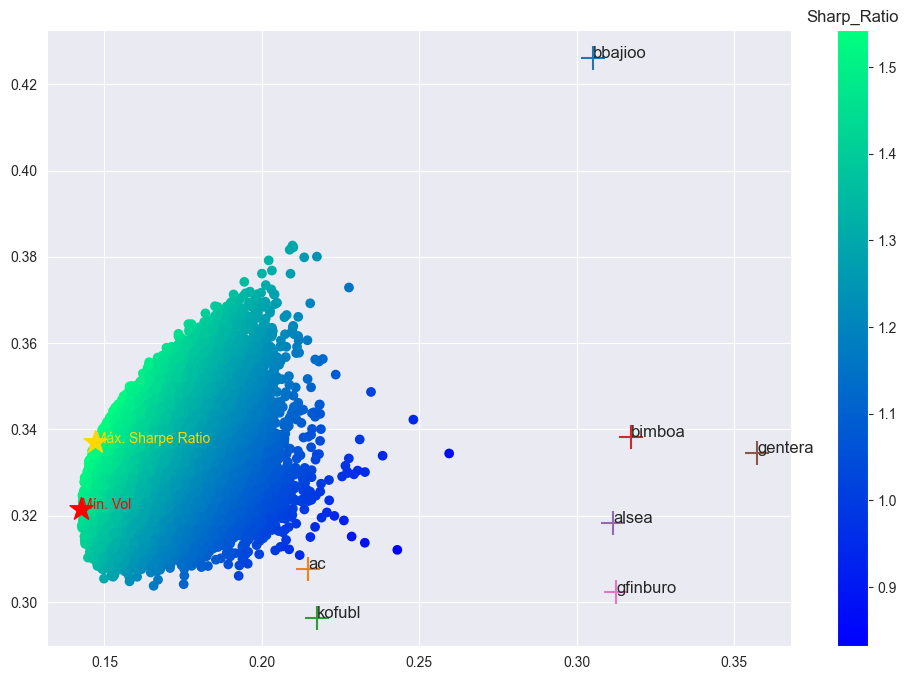

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(x=resultados.Sigma.values, y=resultados.Ret.values, c=resultados.Sharpe, cmap='winter', label='simulacion')

clb = plt.colorbar()
clb.ax.set_title('Sharp_Ratio')

plt.scatter(max_sharp_ratio[2], max_sharp_ratio[1], marker='*', color='gold', s=300, label='Port. Máx. Sharpe Ratio')
plt.text(max_sharp_ratio[2], max_sharp_ratio[1], 'Máx. Sharpe Ratio', color='gold')

plt.scatter(min_vol[2], min_vol[1], marker='*', color='r', s=300, label='Port. Mín. vol')
plt.text(min_vol[2], min_vol[1], 'Mín. Vol', color='r')

            

for n in nombre_acciones:
    plt.scatter(sigma_anual[n], retornos_anuales[n], marker='+', s=300)
    plt.text(sigma_anual[n], retornos_anuales[n], n, fontsize=12);

### <font color='royalblue'>11. Visualizar resultados óptimos</font>

# <font color='#2B17B0'>Rumbo a la Frontera Eficiente</font>

## <font color='royalblue'>Creación de funciones</font>

## <font color='royalblue'>Minimizar</font>
$$
Minimizar: \frac{1}{2}w^T\sum w
\\
\\
Sujeto~~a:\\
w^TR=r_n\\
w^T=1\\
w\geq0
$$

Minimizar la varianza es lo mismo que minimizar la mita de la varianza.
> *NOTA:  Esto significa que si encontramos los pesos de los activos que minimizan la varianza, esos mismos pesos también minimizarán cualquier múltiplo positivo de la varianza. Por lo tanto, ya sea que minimicemos la varianza en sí o la mitad de la varianza, terminaremos con el mismo portafolio óptimo.*

### Función retorno:

In [95]:
resultados.iloc[-1]

# simulacion    80000.000000
Ret                 0.331183
Sigma               0.184486
Sharpe              1.198913
bbajioo             0.176461
ac                  0.064920
kofubl              0.088196
bimboa              0.039445
alsea               0.199066
gentera             0.082972
gfinburo            0.348940
Name: 79999, dtype: float64

In [96]:
np.sum(retornos_anuales[nombre_acciones] * w)

0.3311830929387958

In [97]:
np.dot(retornos_anuales[nombre_acciones], w)

0.3311830929387958

In [98]:
w.T @ retornos_anuales[nombre_acciones]

0.3311830929387958

In [99]:
def portafolio_retorno(pesos_, retornos_):
    """Al recibir los pesos y los retornos
    de cada componente nos entrega, el retorno
    del portafolio
    """
    
    return pesos_.T @ retornos_

In [106]:
portafolio_retorno(resultados.iloc[-1][nombre_acciones], retornos_anuales[nombre_acciones])

0.3311830929387958

In [ ]:
resultados.iloc[-1][nombre_acciones]

# simulacion    80000.000000
Ret                 0.331183
Sigma               0.184486
Sharpe              1.198913
bbajioo             0.176461
ac                  0.064920
kofubl              0.088196
bimboa              0.039445
alsea               0.199066
gentera             0.082972
gfinburo            0.348940
Name: 79999, dtype: float64

### Función volatilidad:

In [110]:
def portafolio_sigma(pesos_, matriz_cov_):
    """Al recibir los pesos y la matriz de var-covar
    de cada componente nos entrega, la sigma
    del portafolio
    """
    
    varianza_portafolio_ = np.dot(pesos_.T,  np.dot(matriz_cov_, pesos_))
    sigma_portafolio_ = np.sqrt(varianza_portafolio_) * np.sqrt(252)
    
    return sigma_portafolio_

In [111]:
portafolio_sigma(resultados.iloc[-1][nombre_acciones], matriz_cov[nombre_acciones])

0.18448638923381144

### Frontera eficiente de 2 activos

In [112]:
activos = ['bimboa', 'gfinburo']

### Encontrar una secuencia de pesos

In [114]:
numero_puntos = 20

pesos = [np.array([w, 1-w]) for w in np.linspace(0,1, numero_puntos)]
pesos

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

### Encontrar los retornos en función a los pesos obtenidos

In [115]:
retornos_2a = [portafolio_retorno(w, retornos_anuales[activos]) for w in pesos]

In [116]:
retornos_2a

[0.3022099835609588,
 0.30410536906779306,
 0.30600075457462733,
 0.3078961400814616,
 0.30979152558829587,
 0.31168691109513014,
 0.3135822966019644,
 0.3154776821087986,
 0.31737306761563294,
 0.3192684531224672,
 0.3211638386293014,
 0.3230592241361357,
 0.32495460964296996,
 0.32684999514980423,
 0.3287453806566385,
 0.33064076616347277,
 0.3325361516703071,
 0.3344315371771413,
 0.33632692268397557,
 0.33822230819080984]

### Encontrar las volatilidades

In [117]:
volatilidad_2a = [portafolio_sigma(w, retornos[activos].cov()) for w in pesos]
volatilidad_2a

[0.31263202408984764,
 0.30159941447281385,
 0.29147106166127784,
 0.2823442958753371,
 0.2743191055914746,
 0.2674946553175455,
 0.2619648033728531,
 0.2578128670968186,
 0.255106133456186,
 0.2538908286351204,
 0.25418834563148246,
 0.25599340986926034,
 0.25927453671714745,
 0.2639766912722995,
 0.2700256475448762,
 0.2773332936752593,
 0.2858030963465664,
 0.29533508534134756,
 0.3058299593526713,
 0.31719215641864695]

In [118]:
frontera_eficiente = pd.DataFrame({'R':retornos_2a, 'Sigma':volatilidad_2a})
frontera_eficiente

,R,Sigma
0,0.302210,0.312632
1,0.304105,0.301599
2,0.306001,0.291471
3,0.307896,0.282344
4,0.309792,0.274319
5,0.311687,0.267495
6,0.313582,0.261965
7,0.315478,0.257813
8,0.317373,0.255106
9,0.319268,0.253891


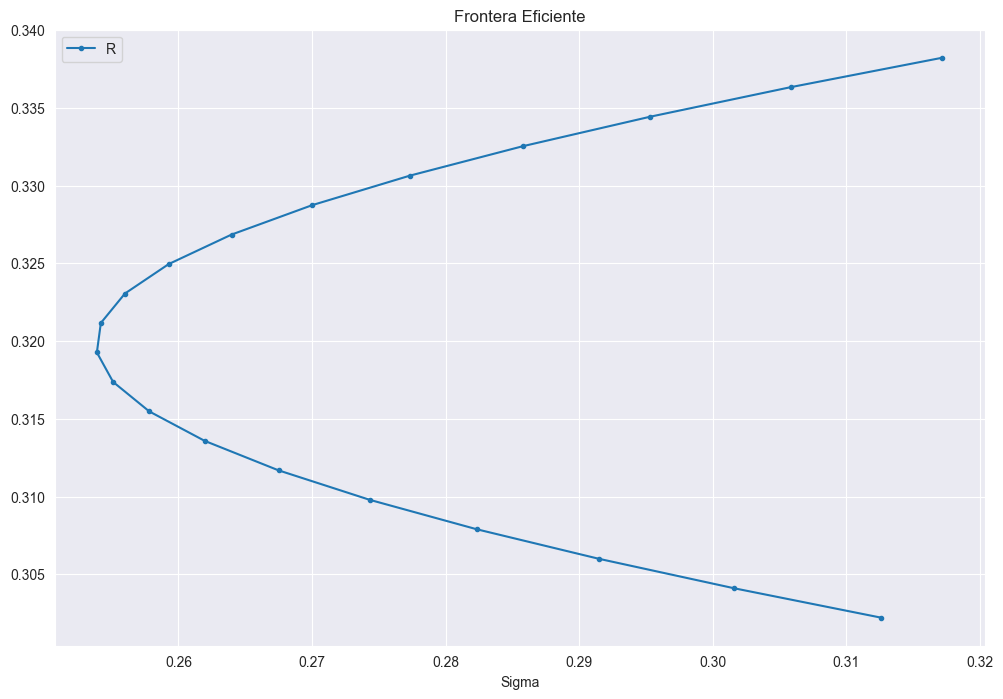

In [120]:
frontera_eficiente.plot.line(x='Sigma', y='R', figsize=(12,8), style='.-', title='Frontera Eficiente');

In [122]:
def fe_2a(n_puntos_, ret_, cov_, act_):
    'Grafica la frontera eficiente'
    
    pesos_ = [np.array([w, 1-w]) for w in np.linspace(0,1, numero_puntos)]
    retornos_2a_ = [portafolio_retorno(w, retornos_anuales[activos]) for w in pesos_]
    volatilidad_2a_ = [portafolio_sigma(w, retornos[activos].cov()) for w in pesos_]
    
    frontera_eficiente_ = pd.DataFrame({'R':retornos_2a_, 'Sigma':volatilidad_2a_})
    
    fig_ = frontera_eficiente_.plot.line(x='Sigma', y='R', figsize=(12,8), style='.-', title='Frontera Eficiente')
    
    return fig_

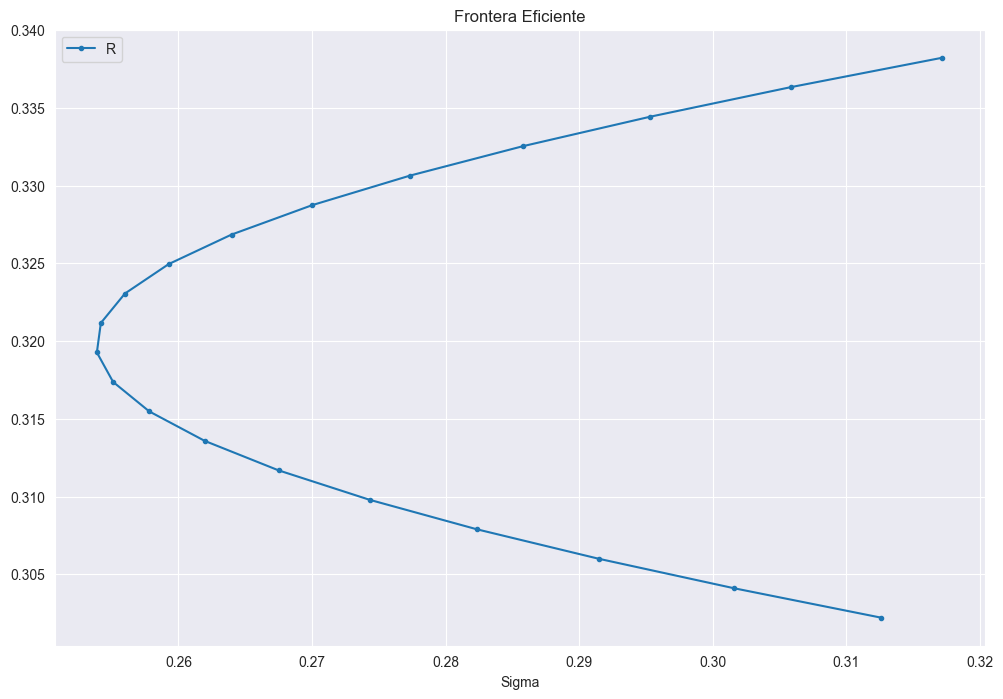

In [123]:
fe_2a(30, retornos_anuales[activos], retornos[activos].cov(), activos);

``` python
def fe_na(n_puntos_, ret_, cov_, act_):
    'Grafica la frontera eficiente'
    
    pesos_ = minimar_vol()<----
    retornos_2a_ = [portafolio_retorno(w, retornos_anuales[activos]) for w in pesos_]
    volatilidad_2a_ = [portafolio_sigma(w, retornos[activos].cov()) for w in pesos_]
    
    frontera_eficiente_ = pd.DataFrame({'R':retornos_2a_, 'Sigma':volatilidad_2a_})
    
    fig_ = frontera_eficiente_.plot.line(x='Sigma', y='R', figsize=(12,8), style='.-', title='Frontera Eficiente')
    
    return fig_
```

In [ ]:
def fe_2a(n_puntos_, ret_, cov_, act_):
    'Grafica la frontera eficiente'
    
    pesos_ = [np.array([w, 1-w]) for w in np.linspace(0,1, numero_puntos)]
    retornos_2a_ = [portafolio_retorno(w, retornos_anuales[activos]) for w in pesos_]
    volatilidad_2a_ = [portafolio_sigma(w, retornos[activos].cov()) for w in pesos_]
    
    frontera_eficiente_ = pd.DataFrame({'R':retornos_2a_, 'Sigma':volatilidad_2a_})
    
    fig_ = frontera_eficiente_.plot.line(x='Sigma', y='R', figsize=(12,8), style='.-', title='Frontera Eficiente')
    
    return fig_



#### <font color='royalblue'>Como generar los pesos</font>
Para encontrar los pesos de los activos que nos den la minima volatilidad dado un retorno objetivo, necesitamos una función que encuentre los pesos que minimize $\sigma$ dado un retorno objetivo.

In [124]:
from scipy.optimize import minimize

In [136]:
def minimizar_volatilidad(retorno_objetivo, ret_, cov_):
    """
    Dado un retorno objetivo, entregar los pesos de los activos
    """
    
    #Encontrar el número de activos entregados
    n = len(ret_.index)
    
    """
    Los inputs que requiere el optimizador son
    * Función objetivo
    * Restricciones
    * Puntos de partida inicial
    """
    
    #Definir pesos iniciales:
    pesos_iniciales = np.repeat(1/n, n)
    
    #Restricciones:
    #Rango de pesos <= 1
    limites = ((0.0, 1.0),) * n
    
    # La suma de los pesos = 1
    pesos_igual_uno = {
        'type': 'eq',
        'fun': lambda pesos: np.sum(pesos) - 1
    }
    
    #Forzar que el retorno = retorno objetivo
    retorno_igual_objetivo = {
        'type': 'eq',
        'args': (ret_, ),
        'fun': lambda pesos, er: retorno_objetivo - portafolio_retorno(pesos, ret_)
    }
    
    #Definir el optimizador (función objetivo):
    pesos = minimize(portafolio_sigma, 
                     pesos_iniciales,
                     args=(cov_,), method='SLSQP',
                     options={'disp': False},
                     constraints= (retorno_igual_objetivo, pesos_igual_uno),
                     bounds= limites
                    )
    
    
    return pesos.x
    

### Probar función
Calculando ciertos precios

In [130]:
activos

['bimboa', 'gfinburo']

In [137]:
w325 = minimizar_volatilidad(.325, retornos_anuales[activos], retornos[activos].cov())
w325

array([0.63283936, 0.36716064])

In [138]:
vol325 = portafolio_sigma(w325, retornos[activos].cov())
vol325

0.2593707973410203

In [151]:
def pesos_optimos(n_puntos, ret_, cov_):
    
    """
    Entrega los w  de los portafolios generados
    """
    
    #1. Definir los retornos esperados
    retorno_objetivos_ = np.linspace(ret_.min(), ret_.max(), n_puntos)
    
    
    #2. Encontrar los w optimizados para cada retorno esperado:
    pesos_ = [minimizar_volatilidad(retorno_objetivo_, ret_, cov_) for retorno_objetivo_ in retorno_objetivos_]
    
    return pesos_

In [152]:
def fe_n(n_puntos_, ret_, cov_):
    'Grafica la frontera eficiente'
    
    pesos_ = pesos_optimos(n_puntos_, ret_, cov_)
    retornos_ = [portafolio_retorno(w, retornos_anuales[activos]) for w in pesos_]
    volatilidad_ = [portafolio_sigma(w, retornos[activos].cov()) for w in pesos_]
    
    frontera_eficiente_ = pd.DataFrame({'R':retornos_, 'Sigma':volatilidad_})
    
    fig_ = frontera_eficiente_.plot.line(x='Sigma', y='R', figsize=(12,8), style='.-', title='Frontera Eficiente')
    
    return fig_

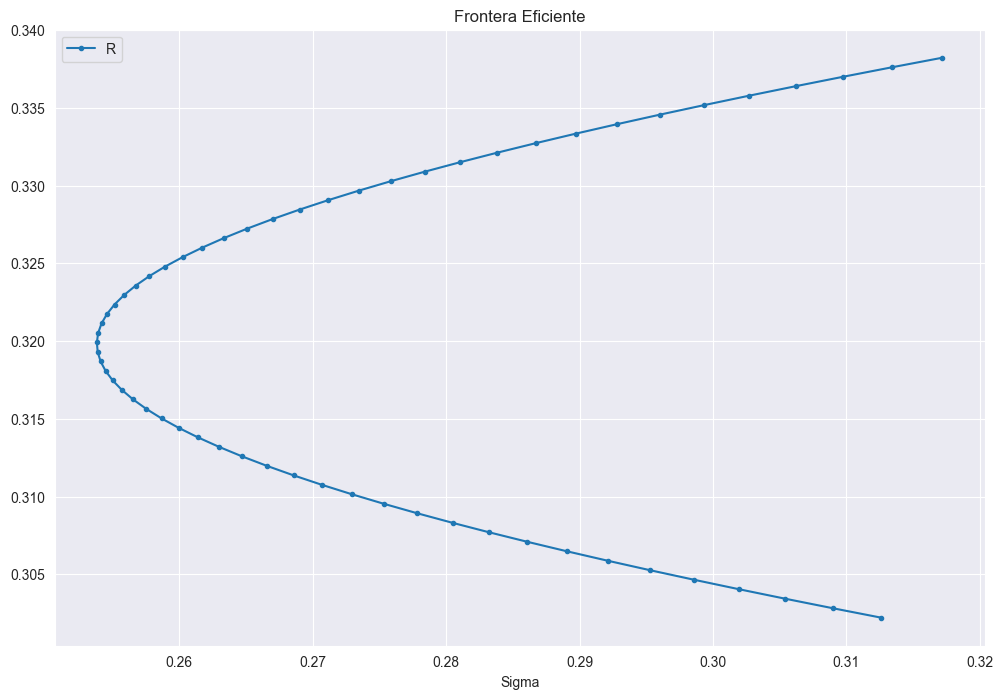

In [153]:
fe_n(60, retornos_anuales[activos], retornos[activos].cov());